In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
#install torchvision and kaggle
!pip install torchvision
!pip install kaggle
!pip install tqdm
!pip install colorama

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 58 kB 12.8 MB/s eta 0:00:01
     |██████████████████

In [3]:
! export KAGGLE_USERNAME="nanabear" && export KAGGLE_KEY="3478ff57622b4a4659e8a45cf259cd73" && kaggle datasets download --unzip kritikseth/fruit-and-vegetable-image-recognition


 99%|██████████████████████████████████████▋| 2.17G/2.19G [00:20<00:00, 171MB/s]
100%|███████████████████████████████████████| 2.19G/2.19G [00:20<00:00, 115MB/s]


In [4]:
! pwd && ls
print("\nFolders(classess) in training folder: ...")

/home/wsuser/work
test  train  validation

Folders(classess) in training folder: ...


In [5]:
ls

test/  train/  validation/


In [6]:
# Create a list with the filepaths for training and testing
train_dir = Path('train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

test_filepaths

[PosixPath('test/capsicum/Image_10.jpg'),
 PosixPath('test/capsicum/Image_8.jpg'),
 PosixPath('test/capsicum/Image_9.jpg'),
 PosixPath('test/capsicum/Image_6.jpg'),
 PosixPath('test/capsicum/Image_7.jpg'),
 PosixPath('test/capsicum/Image_2.jpg'),
 PosixPath('test/capsicum/Image_5.jpg'),
 PosixPath('test/capsicum/Image_4.jpg'),
 PosixPath('test/capsicum/Image_1.jpg'),
 PosixPath('test/lemon/Image_10.jpg'),
 PosixPath('test/lemon/Image_8.jpg'),
 PosixPath('test/lemon/Image_3.jpg'),
 PosixPath('test/lemon/Image_7.jpg'),
 PosixPath('test/lemon/Image_2.jpg'),
 PosixPath('test/lemon/Image_5.jpg'),
 PosixPath('test/lemon/Image_4.jpg'),
 PosixPath('test/soy beans/Image_10.jpg'),
 PosixPath('test/soy beans/Image_8.jpg'),
 PosixPath('test/soy beans/Image_9.jpg'),
 PosixPath('test/soy beans/Image_3.jpg'),
 PosixPath('test/soy beans/Image_6.jpg'),
 PosixPath('test/soy beans/Image_7.jpg'),
 PosixPath('test/soy beans/Image_2.jpg'),
 PosixPath('test/soy beans/Image_5.jpg'),
 PosixPath('test/soy beans

In [7]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 3193

Number of different labels: 36

Labels: ['pear' 'paprika' 'lemon' 'lettuce' 'corn' 'potato' 'cabbage' 'tomato'
 'apple' 'pomegranate' 'onion' 'banana' 'garlic' 'capsicum' 'jalepeno'
 'raddish' 'sweetcorn' 'mango' 'eggplant' 'orange' 'bell pepper' 'grapes'
 'pineapple' 'watermelon' 'ginger' 'beetroot' 'turnip' 'cucumber'
 'soy beans' 'sweetpotato' 'cauliflower' 'carrot' 'chilli pepper'
 'spinach' 'kiwi' 'peas']


In [9]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

,Filepath,Label
0,train/pear/Image_8.jpg,pear
1,train/paprika/Image_81.jpg,paprika
2,train/lemon/Image_69.jpg,lemon
3,train/lettuce/Image_20.jpg,lettuce
4,train/corn/Image_18.jpg,corn


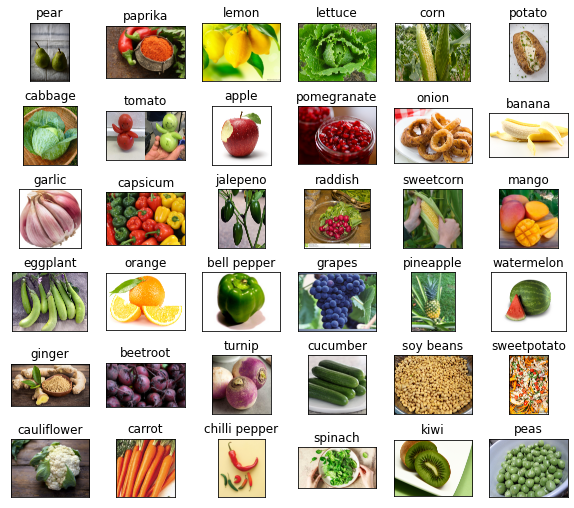

In [10]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3193 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [12]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [13]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
 55/100 [===============>..............] - ETA: 1:54 - loss: 3.1018 - accuracy: 0.2299

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 282s 3s/step - loss: 2.6423 - accuracy: 0.3371 - val_loss: 0.4525 - val_accuracy: 0.8563
Epoch 2/5
100/100 [==============================] - 270s 3s/step - loss: 0.7447 - accuracy: 0.7668 - val_loss: 0.2424 - val_accuracy: 0.9162
Epoch 3/5
100/100 [==============================] - 267s 3s/step - loss: 0.4260 - accuracy: 0.8719 - val_loss: 0.1505 - val_accuracy: 0.9581
Epoch 4/5
100/100 [==============================] - 268s 3s/step - loss: 0.2601 - accuracy: 0.9202 - val_loss: 0.1347 - val_accuracy: 0.9491
Epoch 5/5
100/100 [==============================] - 251s 3s/step - loss: 0.1637 - accuracy: 0.9571 - val_loss: 0.0898 - val_accuracy: 0.9760


In [14]:
from ibm_watson_machine_learning import APIClient
import json

In [15]:
wml_credentials={
    "apikey":"EdxVzVBlJ83LPLhMux2dqpnP8PlV-PnXYoBxSOcsrt4B",
    "url":"https://us-south.ml.cloud.ibm.com"
}
client = APIClient( wml_credentials )
client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
24863ab8-3ddb-49fd-aec1-2880c43d4725  Model  2021-07-25T23:16:26.221Z
------------------------------------  -----  ------------------------


In [16]:
SPACE_ID="24863ab8-3ddb-49fd-aec1-2880c43d4725"
client.set.default_space("24863ab8-3ddb-49fd-aec1-2880c43d4725")

'SUCCESS'

In [17]:
#save model
model_result_path = "keras_model.h5"
model.save(model_result_path)


In [18]:
!tar -zcvf keras_model.tgz keras_model.h5

keras_model.h5


In [19]:
MODEL_NAME="c4chunger"
DEPLOYNAME_NAME="c4chunger deployment"
MODEL= model
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7_opence")

meta_props={
     client.repository.ModelMetaNames.NAME: MODEL_NAME,
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
     client.repository.ModelMetaNames.TYPE: "tensorflow_2.4"
}

#client.software_specifications.list()

software_spec_uid

'c2057dd4-f42c-5f77-a02f-72bdbd3282c9'

In [20]:
 model_artifact = client.repository.store_model(model= 'keras_model.tgz',meta_props=meta_props)

In [21]:
model_id = client.repository.get_model_id(model_artifact)
model_id

'4ff4d22a-5bf6-4e8d-b258-7c57d550830d'